# Hypothesis: Students who have taken AP Computer Science find Comp110 less difficult than those who did not take it



First, I will read the csv and convert it to a column-oriented data table

In [401]:
%reload_ext autoreload
%autoreload 2



In [402]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

## Next I will select the AP Computer Science column and the difficulty ranking column


In [403]:
from data_utils import head, select
from tabulate import tabulate

selected_data: dict[str, list[str]] = select(columns, ["AP_A", "difficulty"])

print(selected_data)

{'AP_A': ['', '', '', '', '', 'Yes', '', '', '', '', '', '', 'No', '', '', '', 'No', '', '', '', 'No', '', 'No', '', '', '', 'No', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'No', '', 'No', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'No', '', '', 'No', '', '', 'No', '', '', '', '', 'No', '', 'No', '', '', '', 'No', '', 'Yes', '', '', '', '', '', '', 'No', '', '', '', '', 'No', '', '', '', '', 'No', '', '', '', '', 'Yes', '', '', 'No', '', '', '', '', '', 'No', 'Yes', '', '', 'No', '', 'No', '', '', 'No', 'Yes', '', '', '', 'No', '', '', '', '', '', '', 'No', '', 'Yes', '', 'No', '', '', 'No', 'No', '', 'No', 'No', '', 'Yes', '', 'No', 'Yes', 'Yes', 'No', '', '', '', '', 'No', '', 'Yes', 'Yes', 'No', '', 'Yes', 'No', '', 'No', 'Yes', 'Yes', 'Yes', 'Yes', '', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', '', 'Yes', 'No', 'No', 'Yes', '', 'No', 'No', 'Yes', 'No', '', 'No', '', 'Yes', '', 'Yes', 'No', 'No', 'No', '', '', '', 'Yes', 'No', 'No', '

# Now I will display the first few rows of the dictionary I am using

### Empty AP_A values represent students who did not report an answer, which are filtered out in the next step

In [404]:
from data_utils import head
from tabulate import tabulate

tabulate(head(selected_data, 15), selected_data.keys(), "html")

AP_A,difficulty
,5
,3
,5
,6
,4
Yes,5
,6
,5
,5
,7


# Now I will use a helper function to filter out all the empty responses for the AP Comp Sci column

In [405]:
from data_utils import filter_data

filtered_dict: dict[str, list[str]] = filter_data(selected_data)

filtered_dict

{'AP_A': ['Yes',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'Yes',
  'No',
  'No',
  'No',
  'Yes',
  'No',
  'No',
  'Yes',
  'No',
  'No',
  'No',
  'Yes',
  'No',
  'No',
  'Yes',
  'No',
  'No',
  'No',
  'No',
  'No',
  'Yes',
  'No',
  'Yes',
  'Yes',
  'No',
  'No',
  'Yes',
  'Yes',
  'No',
  'Yes',
  'No',
  'No',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'No',
  'No',
  'Yes',
  'No',
  'Yes',
  'No',
  'No',
  'No',
  'Yes',
  'No',
  'No',
  'Yes',
  'No',
  'No',
  'Yes',
  'No',
  'No',
  'Yes',
  'Yes',
  'No',
  'No',
  'No',
  'Yes',
  'No',
  'No',
  'No',
  'No',
  'Yes',
  'Yes',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'Yes',
  'No',
  'No',
  'Yes',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'Yes',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'No',
  'Yes',
  'No',
  'No',
  'No',
 

# Now I will count students who did and didn't take AP Comp Sci

In [406]:
from data_utils import count
counts = count(selected_data["AP_A"])
print(counts)

{'': 403, 'Yes': 35, 'No': 135}


# A bar graph to show students who have and haven't taken AP Comp Sci

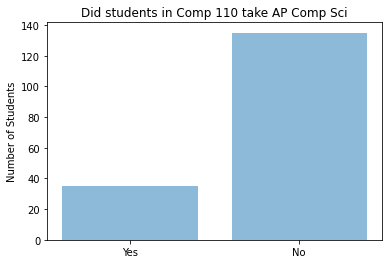

In [407]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

labels = ["Yes", "No"]
y_pos = [0, 1]
performance = [35, 135]

plt.bar(y_pos, performance, align='center', alpha=.5)
plt.xticks(y_pos, labels)
plt.ylabel('Number of Students')
plt.title('Did students in Comp 110 take AP Comp Sci')

plt.show()

# Now I will create a dictionary with the total difficulty rankings of those who took AP Computer Science and those who didn't

In [408]:
from tabulate import tabulate
diff_rankings_dict: dict = {}
i: int = 0
for item in selected_data["AP_A"]:
    if item == "Yes":
        if "Yes" in diff_rankings_dict:
            diff_rankings_dict["Yes"] += int(selected_data["difficulty"][i])
        else:
            diff_rankings_dict["Yes"] = int(selected_data["difficulty"][i])

    if item == "No":
        if "No" in diff_rankings_dict:
            diff_rankings_dict["No"] += int(selected_data["difficulty"][i])
        else:
            diff_rankings_dict["No"] = int(selected_data["difficulty"][i])
    
    i += 1

print(diff_rankings_dict)


{'Yes': 118, 'No': 538}


# Now I will find the average difficulty level of those who took computer science and those who didn't

In [409]:
from tabulate import tabulate
did_take_ap: int = counts["Yes"]
didnt_take_ap: int = counts["No"]

average_difficulty: dict[str, list[float]] = {}
average_difficulty["Took AP Comp Sci"] = [diff_rankings_dict["Yes"] / did_take_ap]
average_difficulty["Didn't take AP Comp Sci"] = [diff_rankings_dict["No"] / didnt_take_ap]

tabulate(average_difficulty, average_difficulty.keys(), "html")

Took AP Comp Sci,Didn't take AP Comp Sci
3.37143,3.98519


# I have displayed a bargraph below to visualize the final results

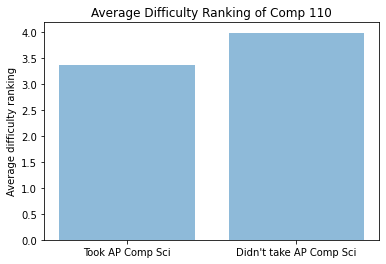

In [410]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

labels = ["Took AP Comp Sci", "Didn't take AP Comp Sci"]
y_pos = [0, 1]
performance = [3.37143, 3.98519]

plt.bar(y_pos, performance, align='center', alpha=.5)
plt.xticks(y_pos, labels)
plt.ylabel('Average difficulty ranking')
plt.title('Average Difficulty Ranking of Comp 110')

plt.show()

# In conclusion, my hypothesis was correct. Students who didn't take AP Computer Science had a slightly higher difficulty ranking of Comp 110 then those who had taken it. 

### It is, however, important to note that a majority of students did not report whether they had taken AP Computer Science, so their responses were not analyzed